### What is an outlier?
An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

### What are the criteria to identify an outlier?

1. Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
2. Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

### What is the reason for an outlier to exists in a dataset?

1. Variability in the data
2. An experimental measurement error

### What are the impacts of having outliers in a dataset?

1. It causes various problems during our statistical analysis
2. It may cause a significant impact on the mean and the standard deviation

### Various ways of finding the outlier.
1. Using scatter plots
2. Box plot
3. using z score
4. using the IQR interquantile range
5. Clustering



In [21]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,12,11,14,13,15,10,15,12,10,14,13,15,10]
dataset.sort()
print(dataset)
print(len(dataset))

[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19, 102, 107]
33


# 1. Detecting outlier using Scatter plots

The Matplotlib module has a method for drawing scatter plots, it needs two arrays of the same length,
one for the values of the x-axis, and one for the values of the y-axis:

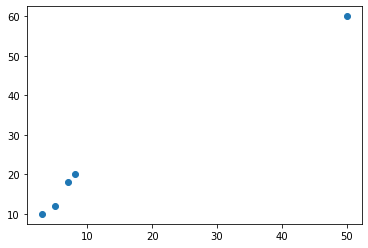

In [4]:
# Scatter plot.
#plt.scatter(dataset)
#sn.scatter(dataset)

import matplotlib.pyplot as plt

x = [3,5,7,8, 50]
y = [10,12,18,20, 60]

plt.scatter(x, y)
plt.show()

[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19, 102, 107, 108]
34


<AxesSubplot:>

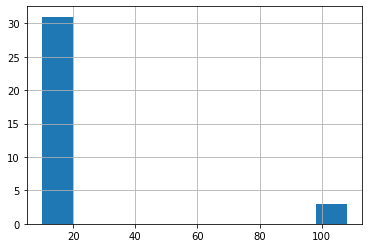

In [5]:
#Using Histogram
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
dataset.sort()
print(dataset)
print(len(dataset))

df = pd.DataFrame (dataset,columns=['Age'])
#print (df)
df['Age'].hist(bins=10)

# 2. Detecting outlier using Box plots

[5, 35, 50, 55, 56, 60, 65, 70, 75, 78, 80, 80, 95, 150]


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

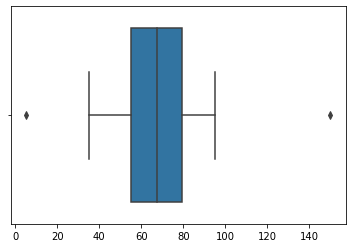

In [6]:
# Box plot.
#df.boxplot(column=['Col1', 'Col2', 'Col3']) # Pandas
#plt.boxplot(dataset) # pyplot
#ds=[5,10,15,20,21,14,15,8,9,8,8,9,6,100,105]
data=[5,35,50,60,70,80,65,55,78,56,75,80,95,150]
data.sort()
print(data)
import seaborn as sn
sn.boxplot(data)   #seaborn

## 3. Detecting outlier using Z score

### Using Z score
#observation: Each data point/ individual data point
Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [32]:
import numpy as np
#dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
#dataset=[5,35,50,60,70,80,65,55,78,56,75,80,95,150]
dataset= [1,2,3,4,5,6,8,10,-50]
outliers=[]

def detect_outliers(data):
    threshold=2            # 1:68%,2:96%,3: 99.95%, >3 = Outlier
    mean = np.mean(data)
    std =np.std(data)
    
    for x in data:
        z_score= (x - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(x)
    return outliers
outlier_pt=detect_outliers(dataset)
outlier_pt

[-50]

# Detecting outlier using std

In [31]:
import numpy as np
#dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
#dataset=[5,35,50,60,70,80,65,55,78,56,75,80,95,150]
#dataset= [1,2,3,4,5,6,8,10,       200]
dataset= [1,2,3,4,5,4,3,2,1,70]
outliers=[]

def detect_outliers(data):
    mean = np.mean(data)
    std =np.std(data)
    lb=mean-2*std      # 1:68%,2:96%,3: 99.95%, >3 = Outlier
    ub=mean+2*std
    print(mean, std, lb,ub)
    for x in data:
        if x <lb or x > ub:
            outliers.append(x)
    return outliers
outlier_pt=detect_outliers(dataset)
outlier_pt

9.5 20.20519735117675 -30.9103947023535 49.9103947023535


[70]

## 4.  InterQuantile Range

Q3:75%- Q1:25% values in a dataset

### Steps
#### 1. Arrange the data in increasing order
#### 2. Calculate first(q1) and third quartile(q3)
#### 3. Find interquartile range (q3-q1)
#### 4.Find lower bound : q1- iqr*1.5
#### 5.Find upper bound :q3 + iqr*1.5

Anything that lies outside of lower and upper bound is an outlier

In [10]:
dataset= [1,2,3,4,5,6,8,10,75,-20]
print(dataset)
print('------------ Sorted set ------------')
## Perform all the steps of IQR
print(sorted(dataset))

[1, 2, 3, 4, 5, 6, 8, 10, 75, -20]
------------ Sorted set ------------
[-20, 1, 2, 3, 4, 5, 6, 8, 10, 75]


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

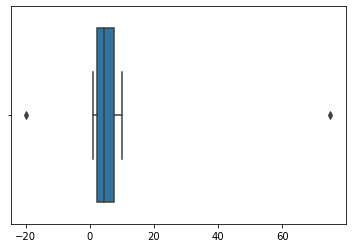

In [11]:
import seaborn as sn
sn.boxplot(dataset) 

In [12]:
#dataset=[1,2,3,100]

In [13]:
import numpy as np
Q1= np.percentile(dataset,25)
Q3= np.percentile(dataset,75)

In [14]:
Q1, Q3= np.percentile(dataset,[25,75])

In [15]:
print(Q1,Q3)

2.25 7.5


In [16]:
## Find the IQR
iqr=Q3-Q1
print(iqr)

5.25


In [17]:
## Find the lower bound value and the higher bound value
lower_bound_val = Q1 -(1.5 * iqr) 
upper_bound_val = Q3 +(1.5 * iqr) 

In [18]:
print(lower_bound_val,upper_bound_val)

-5.625 15.375


In [19]:
outliers=[]

def detect_outliers(data):      
    for x in data:
        if x<lower_bound_val or x> upper_bound_val:
            outliers.append(x)
    return outliers

detect_outliers(dataset)

[75, -20]

In [20]:
def sum(a,b):
    c=a+b
    return c

print(sum(5,10))
print(sum(5,1))

15
6
